# Adhoc example

Copyright 2024 Michael George (AKA Logiqx).

This file is distributed under the terms of the GNU General Public License.

It is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

It is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this example. If not, see <https://www.gnu.org/licenses/>.

In [9]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [10]:
FIG_WIDTH = 10
FIG_HEIGHT = 5

IMG_FOLDER = 'img'

In [11]:
fin = np.array([31.996, 31.549, 32.171, 34.212, 34.134, 33.201, 33.084, 32.618, 33.201, 33.298, 33.395, 33.492, 33.687, 34.056, 34.367, 34.775, 35.261, 35.086, 34.989, 34.756, 34.892, 34.892, 35.378, 34.717, 35.242, 36.758, 37.497, 38.002, 38.546, 38.877, 39.227, 38.76, 38.78, 40.024, 40.51, 40.665, 40.762, 41.171, 39.052, 38.877, 38.702, 39.052, 38.702, 38.449, 37.866, 37.711, 38.644, 37.924, 37.477, 37.361, 37.924, 39.032, 38.721, 37.711, 37.166, 35.009, 35.009, 35.436, 35.222, 35.436, 35.572, 34.931, 36.544, 36.194, 35.961, 34.873, 33.706, 33.084, 33.745, 33.784, 33.045, 33.492, 33.765, 33.706, 33.045])
foil = np.array([27.735, 28.512, 29.146, 28.924, 28.505, 28.713, 29.28, 29.278, 28.893, 29.539, 29.624, 29.088, 29.537, 29.544, 30.054, 30.326, 29.593, 29.605, 29.811, 30.549, 31.012, 30.456, 29.801, 30.583, 29.675, 30.825, 31.03, 29.873, 29.857, 30.419, 31.251, 30.423, 30.295, 30.555, 31.053, 32.087, 31.03, 30.921, 31.92, 32.044, 31.805, 31.628, 32.569, 32.66, 31.586, 32.276, 32.713, 32.76, 31.883, 32.136, 32.297, 32.548, 31.898, 31.42, 31.652, 31.751, 31.593, 31.784, 31.344, 31.072, 30.993, 31.311, 31.208, 31.082, 30.643, 31.471, 31.533, 31.228, 31.057, 31.304, 31.422, 30.561, 30.812, 30.631, 30.373, 30.316, 30.38, 29.927, 29.939, 29.931, 29.85, 30.027, 30.009, 30.065, 29.558, 28.804, 28.644, 28.819, 28.843, 28.837, 28.038, 27.797, 27.34, 27.575, 27.974, 27.813])

min data 31.55
mean data 36.0
max data 41.17


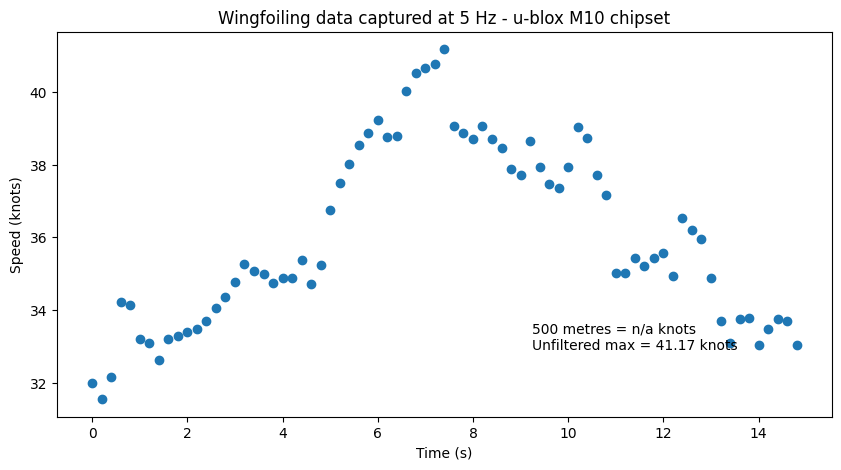

min data 31.55
mean data 36.0
max data 41.17

min savgol 32.17
mean savgol 35.99
max savgol 39.96


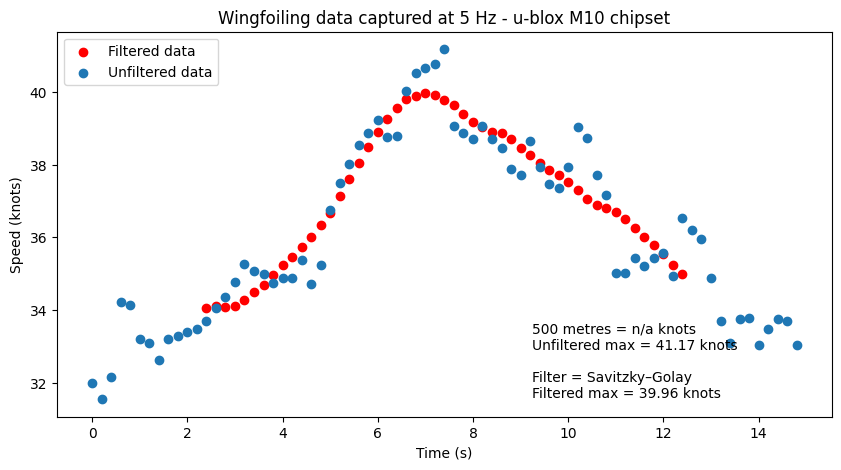

min data 31.55
mean data 36.0
max data 41.17

min savgol 31.42
mean savgol 35.99
max savgol 40.63


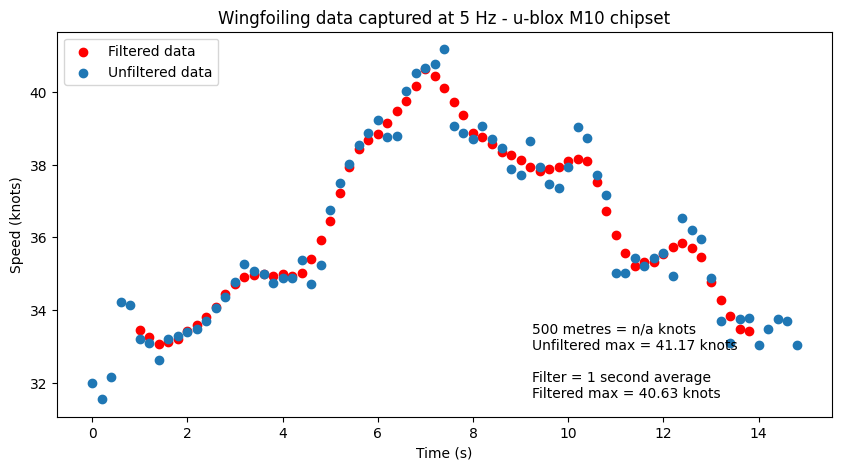

min data 31.55
mean data 36.0
max data 41.17

min savgol 32.37
mean savgol 35.99
max savgol 39.78


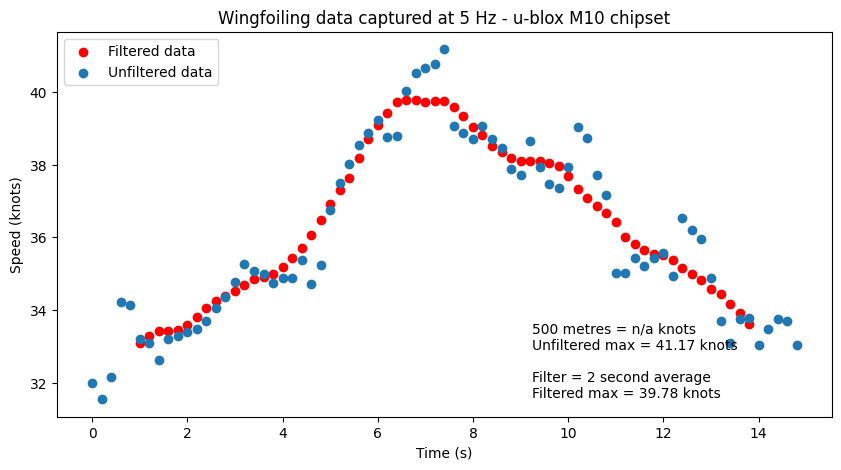

min data 27.34
mean data 30.38
max data 32.76


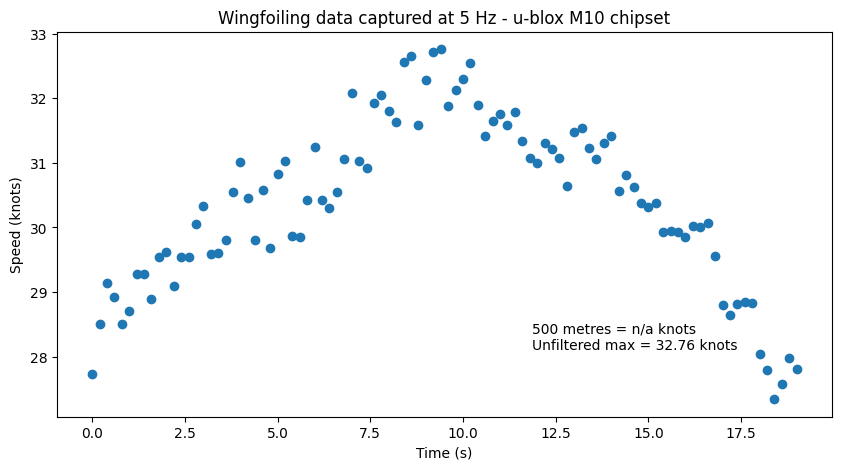

min data 27.34
mean data 30.38
max data 32.76

min savgol 27.35
mean savgol 30.39
max savgol 32.31


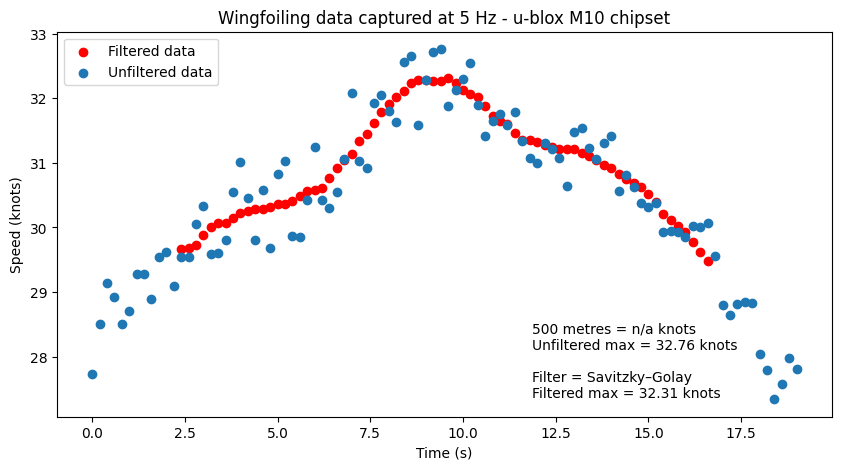

min data 27.34
mean data 30.38
max data 32.76

min savgol 27.7
mean savgol 30.38
max savgol 32.4


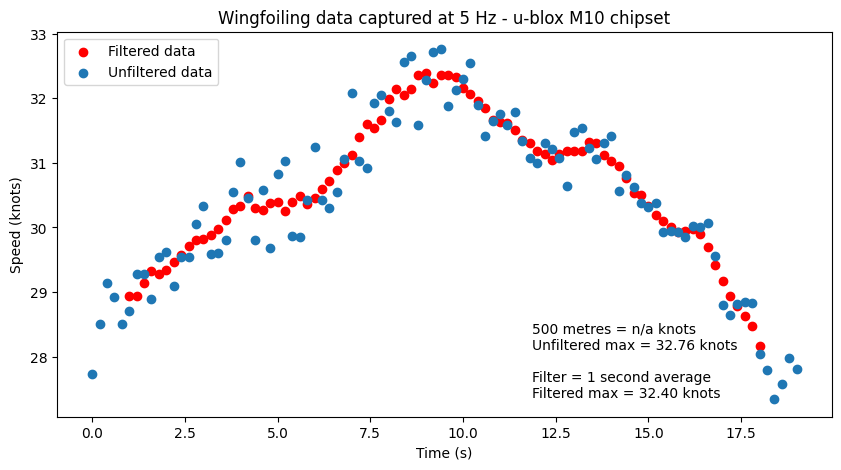

min data 27.34
mean data 30.38
max data 32.76

min savgol 27.5
mean savgol 30.37
max savgol 32.34


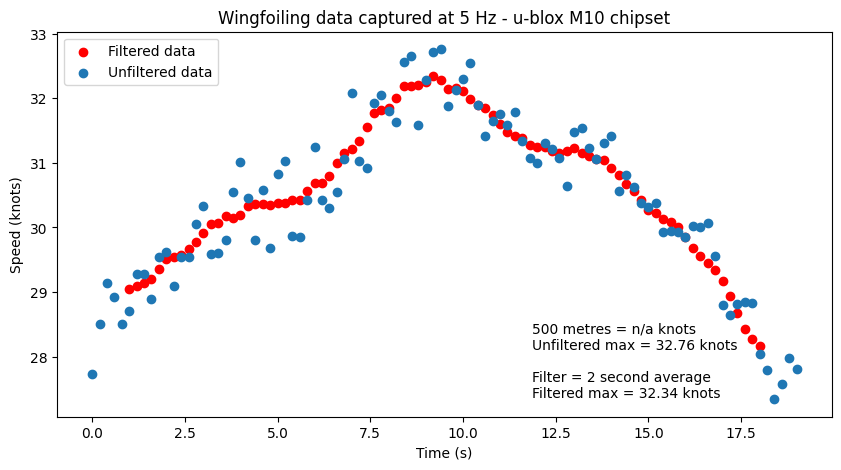


All done!


In [12]:
def main(data, speed500=0, name='4-adhoc', desc='Savitzky–Golay filter', window_length=1, polyorder=0, hide=0):
    '''Create example chart'''
    
    x = np.array(range(len(data))) / 5
    y = data

    print('min data', np.round(np.min(y), 2))
    print('mean data', np.round(np.mean(y), 2))
    print('max data', np.round(np.max(y), 2))

    if window_length > 1:
        yhat = savgol_filter(y, window_length, polyorder)
    
        print()
        print('min savgol', np.round(np.min(yhat), 2))
        print('mean savgol', np.round(np.mean(yhat), 2))
        print('max savgol', np.round(np.max(yhat), 2))

    fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

    if window_length > 1:
        plt.scatter(x[hide:-hide], yhat[hide:-hide], label ='Filtered data', color='red')
    plt.scatter(x, y, label ='Unfiltered data')
    
    plt.title('Wingfoiling data captured at 5 Hz - u-blox M10 chipset')

    plt.xlabel("Time (s)")
    plt.ylabel("Speed (knots)")

    if window_length > 1:
        ax = fig.get_axes()[0]
        ax.legend(loc = 'upper left')

    comment = '500 metres = {} knots\nUnfiltered max = {:.2f} knots'.format(speed500, np.max(y))
    if window_length > 1:
        comment += '\n\nFilter = {}\nFiltered max = {:.2f} knots'.format(desc, np.max(yhat))
    fig.text(0.60, 0.30, comment, verticalalignment='top')

    plt.show()

    fname = os.path.join(IMG_FOLDER, name + '.png')
    fig.savefig(fname, bbox_inches='tight')


if __name__ == '__main__':
    projdir = os.path.realpath(os.path.join(sys.path[0], "..", ".."))

    main(data=fin, speed500='n/a', name='4-fin')
    main(data=fin, speed500='n/a', name='4-fin-0-savgol', desc='Savitzky–Golay', window_length=25, polyorder=2, hide=12)
    main(data=fin, speed500='n/a', name='4-fin-1s', desc='1 second average', window_length=5, polyorder=1, hide=5)
    main(data=fin, speed500='n/a', name='4-fin-2s', desc='2 second average', window_length=10, polyorder=1, hide=5)
    
    main(data=foil, speed500='n/a', name='4-foil')
    main(data=foil, speed500='n/a', name='4-foil-0-savgol', desc='Savitzky–Golay', window_length=25, polyorder=2, hide=12)
    main(data=foil, speed500='n/a', name='4-foil-1s', desc='1 second average', window_length=5, polyorder=1, hide=5)
    main(data=foil, speed500='n/a', name='4-foil-2s', desc='2 second average', window_length=10, polyorder=1, hide=5)
    
    print(os.linesep + 'All done!')